In [1]:
import  numpy  as np
import  matplotlib  as mpl
import pandas as pd
import pylab as plt
import csv

In [5]:
gene_dat=pd.read_csv('vcf_FA.csv',index_col='Unnamed: 0',encoding='utf-8')
matrix=gene_dat.as_matrix()
#print(matrix.shape[0])
#matrix[0]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [6]:
gene_mut=np.zeros((matrix.shape[0],int(np.ceil((matrix.shape[1])/2))))
#print(gene_mut.shape)

In [7]:
# will go through each row (# of observations)
for rows in range(matrix.shape[0]):
    for cols in range(0,matrix.shape[1]-1,2):
        # within those observations, it will go until the 2nd to last column (excludes phenotype)
        #sanity check (next 2 lines)
        #print('cols val is:',cols)
        #print('matrix values are: ',matrix[rows][cols],matrix[rows][cols+1])
        #checks to see if either the L or R gene has a mutation
        if(matrix[rows][cols]==1 or matrix[rows][cols+1]==1):
            #if it does, then in the copied matrix, a 1 will be input
            gene_mut[rows][int(cols/2)]=1
            #reason for int(cols/2) is to match up indexes with the pairing # that it's on
            #ex: 0&1 gene output val. will be in the 0 index of copied matrix
            # 2&3 gene output val. will be in the 1 index, 4*6 in the 2nd index
        #sanity check of what is being output
        #print('copy matrix val is:',gene_mut[rows][int(cols/2)], 'for row:',rows,'for col:',int(cols/2))

In [8]:
gene_mut[:,-1]=matrix[:,-1] # gets last column from original matrix, puts it as last column for copied matrix


In [9]:
# getting column names of genes without the L or R
names=gene_dat.columns
new_colnames=[]
for n in range(0,len(names),2):
    new_colnames.append(names[n].split("-")[0])
#print(new_colnames)

In [10]:
copied_data=pd.DataFrame(gene_mut,index=gene_dat.index,columns=new_colnames)

In [11]:
copied_data.to_csv("copiedGeneData.csv")

In [60]:

rdm13=pd.read_csv('copiedGeneData.csv',index_col='Unnamed: 0',encoding='utf-8')
rdm13_matrix=rdm13.as_matrix()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
def num_gene_mutations(raw_data):
    n_ones=[]
    # 0 to number of total rows
    for row in range(0,(raw_data.shape[0])):
        #calculating each person's number of gene mutations, excluding last column with phenotype levels
        n_ones.append(sum(raw_data[row,:-1]))
    return n_ones


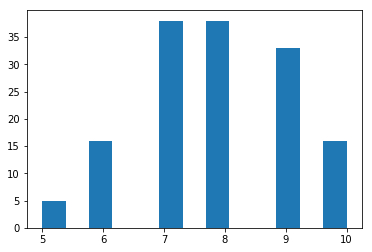

list

In [65]:
sum_gene_mut=num_gene_mutations(rdm13_matrix)
#print(sum_gene_mut)
#for printing total number of people based on number of gene mutations
plt.hist(sum_gene_mut,bins=13)
plt.show()
type(sum_gene_mut)

In [102]:
col_sums=(rdm13.sum(axis=0))

In [103]:
col_sums[:-1]

rs58696423     143.0
rs11122283      20.0
rs2034327      139.0
rs149306391    137.0
rs4149433      112.0
rs35307        120.0
rs10739461     114.0
rs771998       125.0
rs117426293     15.0
rs233948        86.0
rs62054604       4.0
rs4313809       63.0
rs139501        70.0
dtype: float64

In [48]:
sum_each_gene=[]
for i in range(rdm13.shape[1]-1):
    sum_each_gene.append(sum(rdm13[:,i]))

(array([ 2.,  1.,  0.,  0.,  2.,  1.,  0.,  2.,  2.,  3.]),
 array([   4. ,   17.9,   31.8,   45.7,   59.6,   73.5,   87.4,  101.3,
         115.2,  129.1,  143. ]),
 <a list of 10 Patch objects>)

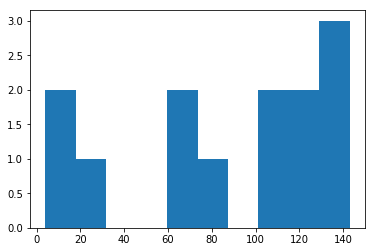

In [104]:
plt.hist(col_sums[:-1])
plt.

In [54]:
plt.hist(sum_each_gene,bins=13,)
plt.show()

SyntaxError: keyword can't be an expression (<ipython-input-54-7dea485e7376>, line 1)